In [ ]:
#램늘리는코드작동안함
#from tqdm import tqdm_notebook
#ram = []
#for i in tqdm_notebook(range(100000)):
#  ram.append('램터트리기'*i)

<ipython-input-1-dcaa0d8d7a6a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(100000)):


  0%|          | 0/100000 [00:00<?, ?it/s]

In [2]:
# IMDB리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋
# 훈련데이터와 테스트 데이터 각각 25000개씩 나누어져 있음
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # num_words=500 : 전체 데이터셋에서 가장 자주 등장하는 단어 500개 사용

In [3]:
print(train_input.shape, test_input.shape) # 리뷰텍스트는 길이가 제각각이므로 1차원배열에 개별리뷰를 담은 파이썬 리스트 객체가 들어있다.

(25000,) (25000,)


In [4]:
# 텍스트 리뷰데이터는 공백을 기준으로 토큰으로 분류할 수 있음
# 토큰에는 정수가 할당됨
# 0: 패딩, 1: 문장의 시작, 2: 어휘사전에 없는 단어(ex. 500개 이외의 단어)

In [5]:
print(len(train_input[0])) # 첫번째 리뷰의 길이
print(len(train_input[1])) # 두번째

218
189


In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
print(train_target[:20]) # 1:긍정, 2:부정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input]) # 데이터의 길이 분석을 위하여 데이터길이 넘파이 배열을 만들기
print(np.mean(lengths), np.median(lengths)) # 데이터길이의 평균과 중앙값

239.00925 178.0


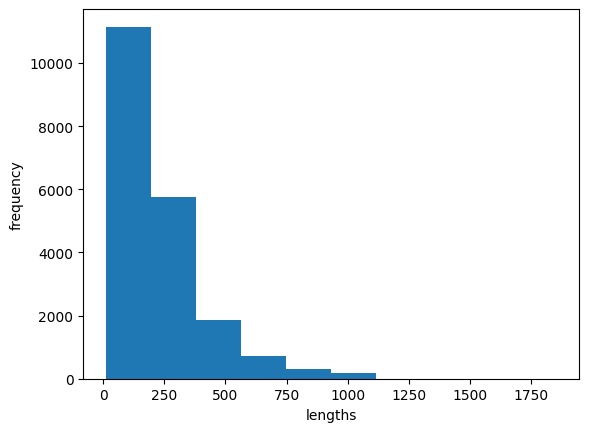

In [10]:
# 데이터길이 시각화
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [11]:
# input데이터의 길이를 100으로 맞춰주기 (100보다 짧으면 0으로 패딩, 길면 자르기)
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) # pad_sequences : 길이를 맞춰주는 메소드

In [12]:
print(train_seq.shape) # 2차원이 됨, 한 데이터 당 100개의 타임스텝

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:]) # 100이 넘어가면 앞부분을 자름(뒤에 핵심내용이 있다고 판단) / 뒤자르기 : pad_sequences(, truncating=post)

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
print(train_seq[5]) # 앞부분에 패딩 (시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 됨)

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

In [17]:
# 순환신경망 만들기 (SimpleRNN클래스 사용, 이진분류이므로 시그모이드 활성화 함수를 사용)
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # 원핫인코딩으로 인한 input_shape=(100,500) 100개의 토큰, 500개의 배열크기
# SimpleRNN의 activation 매개변수의 기본값은 tanh(하이퍼볼릭탄젠트함수)
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
# 원핫인코딩 : 토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듬 (출력의 영향이 달라서는 안됨)
# 현재 모델에서 정수의 범위는 0~499 이므로 배열을 만들어 0으로 채우고 해당 정수의 인덱스 부분만 1으로 만듬
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)
# 20000개 문장, 1000개 토큰, 500 정수범위

(20000, 100, 500)


In [19]:
print(train_oh[0][0][:12]) # 첫번째 문장의 첫번째 토큰 : 10
# 인덱스 10에 원핫인코딩됨

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
print(np.sum(train_oh[0][0])) # 모두 더해서 1이면 나머지가 모두 0

1.0


In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()
# 8개 뉴런
# 토큰*뉴런개수 + 은닉상태크기*뉴런개수 + 절편 = 4000 + 64 + 8 = 4072

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 순환신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data = (val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
# 램이 부족해서 학습이 안됨

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.4979

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [1]:
print(train_seq.nbytes, tran_oh.nbytes)

NameError: ignored

In [24]:
# 원핫인코딩 대신 단어 임베딩을 사용하기
# 단어임베딩 : 순환신경망에서 텍스트를 처리할 때 각 단어를 고정된 크기의 실수 벡터로 바꿈
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100)) # 500개의 어휘사전의 크기, 16임베딩벡터의 크기
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [25]:
model2.summary()
# embedding : 500*16 = 80000
# simpltrnn : 16*8 + 8*8 + 8

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 58s 161ms/step - loss: 0.6891 - accuracy: 0.5364 - val_loss: 0.6733 - val_accuracy: 0.6136
Epoch 2/100
313/313 [==============================] - 35s 113ms/step - loss: 0.6551 - accuracy: 0.6574 - val_loss: 0.6449 - val_accuracy: 0.6778
Epoch 3/100
313/313 [==============================] - 34s 108ms/step - loss: 0.6254 - accuracy: 0.7101 - val_loss: 0.6205 - val_accuracy: 0.6988
Epoch 4/100
313/313 [==============================] - 36s 114ms/step - loss: 0.5987 - accuracy: 0.7339 - val_loss: 0.5938 - val_accuracy: 0.7248
Epoch 5/100
313/313 [==============================] - 36s 114ms/step - loss: 0.5728 - accuracy: 0.7516 - val_loss: 0.5653 - val_accuracy: 0.7558
Epoch 6/100
313/313 [==============================] - 35s 112ms/step - loss: 0.5465 - accuracy: 0.7679 - val_loss: 0.5440 - val_accuracy: 0.7636
Epoch 7/100
313/313 [==============================] - 35s 111ms/step - loss: 0.5208 - accuracy: 0.7745 - val_loss: 0.5321 -

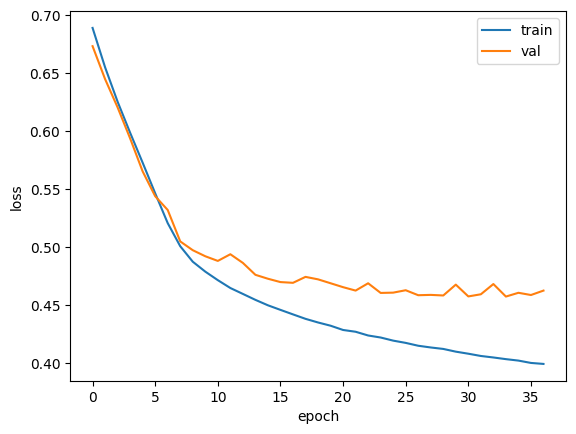

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()